<a href="https://colab.research.google.com/github/Amarpreet3/CIND-820-CAPSTONE/blob/main/Initial_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset

##Loading the Dataset:

In [17]:
import pandas as pd

# Read the individual CSV files
btc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Bitcoin.csv")
eth_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Ethereum.csv")
xrp_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_XRP.csv")
ltc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Litecoin.csv")
usdc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_USDCoin.csv")

# Concatenate the datasets vertically
df = pd.concat([btc_df, eth_df, xrp_df, ltc_df, usdc_df])

# Save the merged dataset to a new CSV file
df.to_csv("cryptocurrency.csv", index=False)



#EDA

##Summarizing the Dataset:

In [18]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [19]:
df.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
997,998,USD Coin,USDC,2021-07-02 23:59:59,1.000916,0.999966,1.000177,1.000035,1.787896e+09,2.539775e+10
998,999,USD Coin,USDC,2021-07-03 23:59:59,1.000670,0.999925,1.000048,0.999984,1.491017e+09,2.550437e+10
999,1000,USD Coin,USDC,2021-07-04 23:59:59,1.000187,0.998901,0.999956,0.999500,1.578667e+09,2.551172e+10
1000,1001,USD Coin,USDC,2021-07-05 23:59:59,1.000839,0.999459,0.999565,1.000528,1.887496e+09,2.554724e+10
1001,1002,USD Coin,USDC,2021-07-06 23:59:59,1.000731,0.999662,1.000501,1.000059,2.312602e+09,2.567322e+10


In [20]:
df.sum()

SNo                                                   15971626
Name         BitcoinBitcoinBitcoinBitcoinBitcoinBitcoinBitc...
Symbol       BTCBTCBTCBTCBTCBTCBTCBTCBTCBTCBTCBTCBTCBTCBTCB...
Date         2013-04-29 23:59:592013-04-30 23:59:592013-05-...
High                                           21633473.513923
Low                                            20331348.557578
Open                                           21016141.177212
Close                                          21051795.367431
Volume                                   56005776688965.554688
Marketcap                                 491468993459787.0625
dtype: object

In [21]:
df['Name'].value_counts()

Bitcoin     2991
Litecoin    2991
XRP         2893
Ethereum    2160
USD Coin    1002
Name: Name, dtype: int64

In [22]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [33]:
# Get the data types of each column
print(df.dtypes)

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object


In [23]:
df.isnull().count()

SNo          12037
Name         12037
Symbol       12037
Date         12037
High         12037
Low          12037
Open         12037
Close        12037
Volume       12037
Marketcap    12037
dtype: int64

In [24]:

# Get the shape of the merged dataset
rows, columns = df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)


Number of rows: 12037
Number of columns: 10


In [25]:

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by each coin
grouped_df = df.groupby('Symbol')

# Calculate the date duration for each coin
for symbol, group in grouped_df:
    min_date = group['Date'].min()
    max_date = group['Date'].max()
    duration = max_date - min_date
    
    print("Coin:", symbol)
    print("Start Date:", min_date)
    print("End Date:", max_date)
    print("Date Duration:", duration)
    print()


Coin: BTC
Start Date: 2013-04-29 23:59:59
End Date: 2021-07-06 23:59:59
Date Duration: 2990 days 00:00:00

Coin: ETH
Start Date: 2015-08-08 23:59:59
End Date: 2021-07-06 23:59:59
Date Duration: 2159 days 00:00:00

Coin: LTC
Start Date: 2013-04-29 23:59:59
End Date: 2021-07-06 23:59:59
Date Duration: 2990 days 00:00:00

Coin: USDC
Start Date: 2018-10-09 23:59:59
End Date: 2021-07-06 23:59:59
Date Duration: 1001 days 00:00:00

Coin: XRP
Start Date: 2013-08-05 23:59:59
End Date: 2021-07-06 23:59:59
Date Duration: 2892 days 00:00:00



In [26]:
df.Name.unique()

array(['Bitcoin', 'Ethereum', 'XRP', 'Litecoin', 'USD Coin'], dtype=object)

In [27]:
df.Symbol.unique()

array(['BTC', 'ETH', 'XRP', 'LTC', 'USDC'], dtype=object)

In [28]:
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12037 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        12037 non-null  int64         
 1   Name       12037 non-null  object        
 2   Symbol     12037 non-null  object        
 3   Date       12037 non-null  datetime64[ns]
 4   High       12037 non-null  float64       
 5   Low        12037 non-null  float64       
 6   Open       12037 non-null  float64       
 7   Close      12037 non-null  float64       
 8   Volume     12037 non-null  float64       
 9   Marketcap  12037 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [31]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,12037.000000,12037.000000,12037.000000,12037.000000,12037.000000,1.203700e+04,1.203700e+04
mean,1326.877627,1797.247945,1689.071077,1745.961716,1748.923766,4.652802e+09,4.082986e+10
std,836.777590,6507.990175,6085.346811,6312.961050,6319.601286,1.141572e+10,1.194340e+11
min,1.000000,0.003082,0.002802,0.002809,0.002810,0.000000e+00,0.000000e+00
25%,602.000000,1.000692,0.990570,0.999090,0.999228,5.895540e+06,3.682208e+08
50%,1255.000000,33.345750,30.523111,32.016525,32.001958,3.204215e+08,5.655924e+09
75%,2007.000000,372.767424,350.941986,360.312012,361.045990,3.146472e+09,2.090613e+10
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SNo,12037.0,1.326878e+03,8.367776e+02,1.000000,6.020000e+02,1.255000e+03,2.007000e+03,2.991000e+03
High,12037.0,1.797248e+03,6.507990e+03,0.003082,1.000692e+00,3.334575e+01,3.727674e+02,6.486310e+04
Low,12037.0,1.689071e+03,6.085347e+03,0.002802,9.905703e-01,3.052311e+01,3.509420e+02,6.220896e+04
Open,12037.0,1.745962e+03,6.312961e+03,0.002809,9.990903e-01,3.201653e+01,3.603120e+02,6.352375e+04
Close,12037.0,1.748924e+03,6.319601e+03,0.002810,9.992283e-01,3.200196e+01,3.610460e+02,6.350346e+04
Volume,12037.0,4.652802e+09,1.141572e+10,0.000000,5.895540e+06,3.204215e+08,3.146472e+09,3.509679e+11
Marketcap,12037.0,4.082986e+10,1.194340e+11,0.000000,3.682208e+08,5.655924e+09,2.090613e+10,1.186364e+12


##Visualizing the Data:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

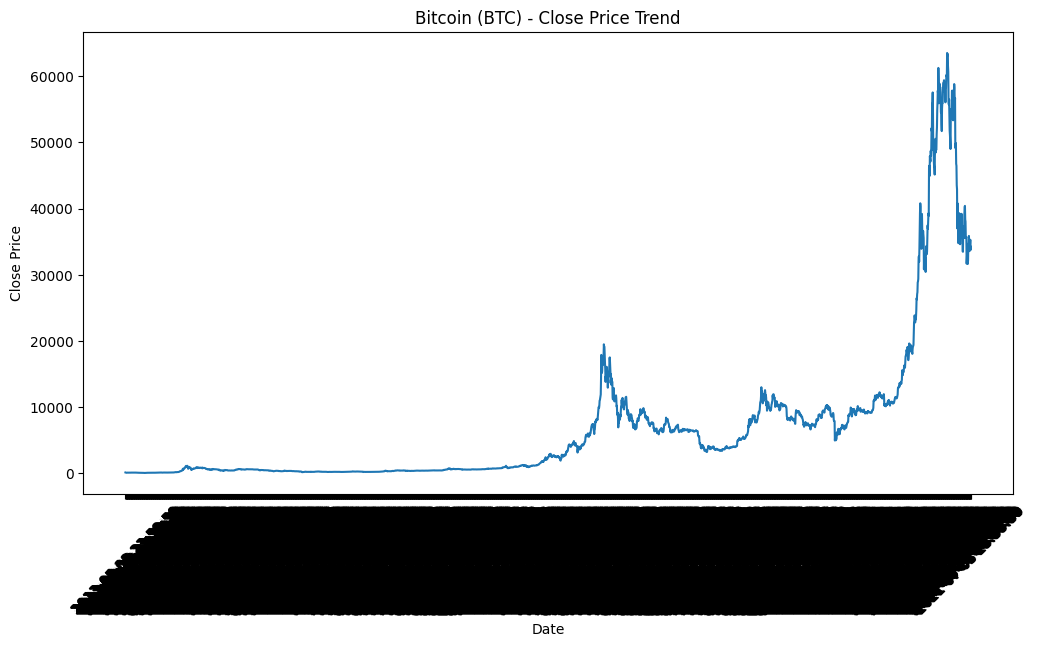

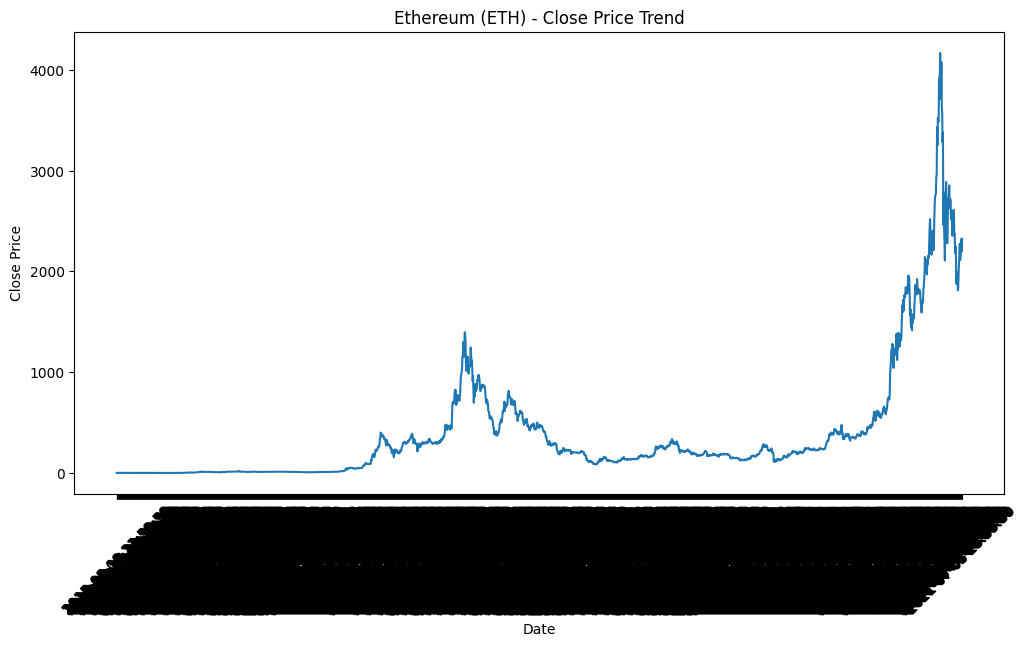

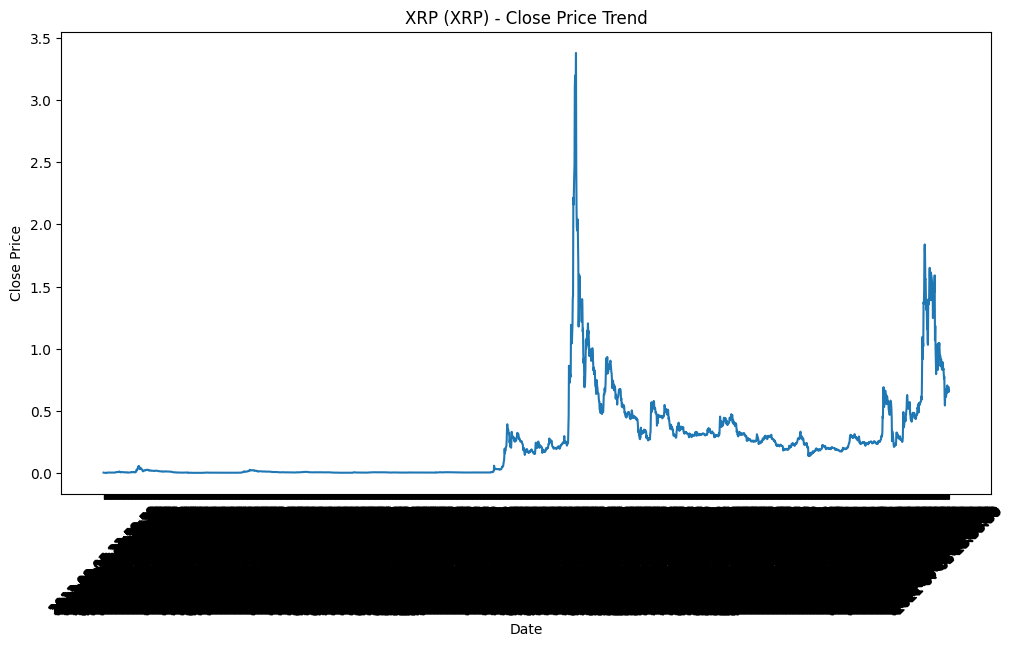

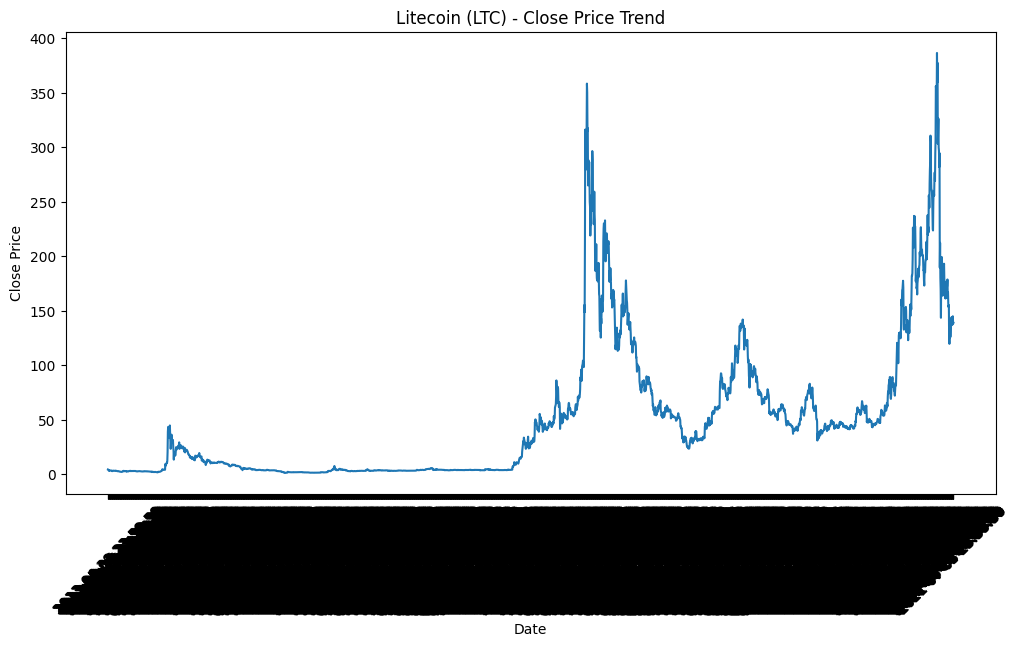

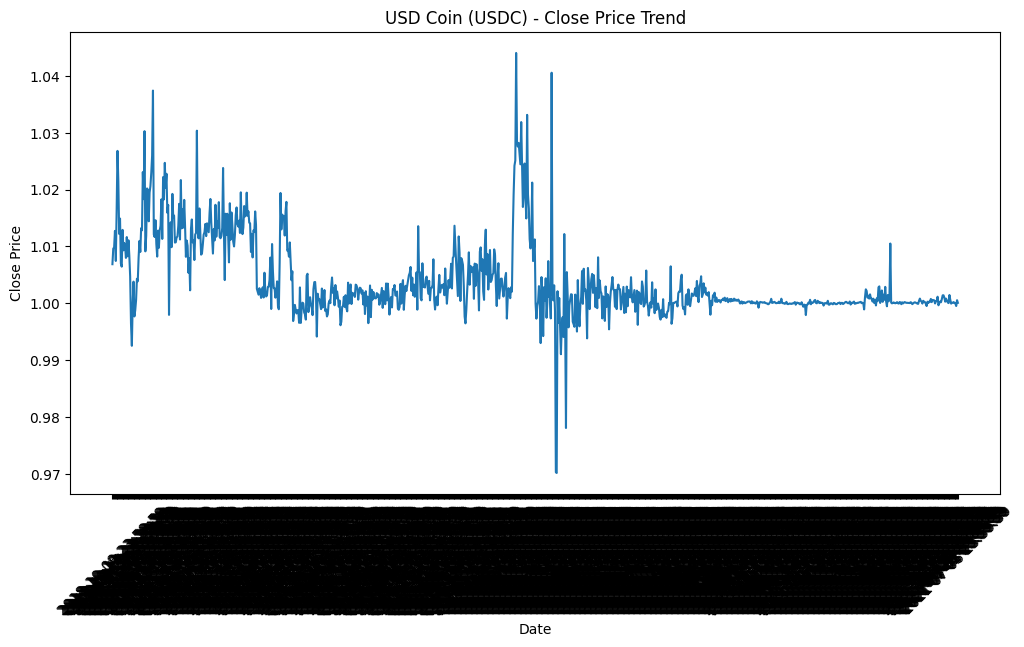

<ipython-input-39-44948b3ca891>:63: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


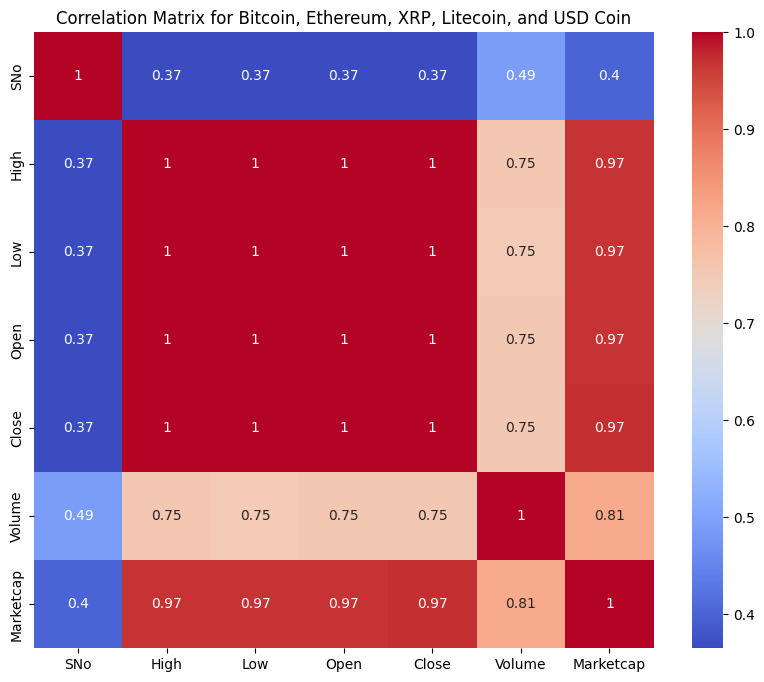

In [39]:

# Filter data for Bitcoin (BTC)
btc_df = df[df['Symbol'] == 'BTC']

# Filter data for Ethereum (ETH)
eth_df = df[df['Symbol'] == 'ETH']

# Filter data for XRP (XRP)
xrp_df = df[df['Symbol'] == 'XRP']

# Filter data for Litecoin (LTC)
ltc_df = df[df['Symbol'] == 'LTC']

# Filter data for USD Coin (USDC)
usdc_df = df[df['Symbol'] == 'USDC']

# Visualize the trend of 'Close' prices for Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(btc_df['Date'], btc_df['Close'])
plt.title("Bitcoin (BTC) - Close Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()

# Visualize the trend of 'Close' prices for Ethereum
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Date'], eth_df['Close'])
plt.title("Ethereum (ETH) - Close Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()

# Visualize the trend of 'Close' prices for XRP
plt.figure(figsize=(12, 6))
plt.plot(xrp_df['Date'], xrp_df['Close'])
plt.title("XRP (XRP) - Close Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()

# Visualize the trend of 'Close' prices for Litecoin
plt.figure(figsize=(12, 6))
plt.plot(ltc_df['Date'], ltc_df['Close'])
plt.title("Litecoin (LTC) - Close Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()

# Visualize the trend of 'Close' prices for USD Coin
plt.figure(figsize=(12, 6))
plt.plot(usdc_df['Date'], usdc_df['Close'])
plt.title("USD Coin (USDC) - Close Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()

# Calculate the correlation matrix for Bitcoin, Ethereum, XRP, Litecoin, and USD Coin
subset_df = pd.concat([btc_df, eth_df, xrp_df, ltc_df, usdc_df])
correlation_matrix = subset_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Bitcoin, Ethereum, XRP, Litecoin, and USD Coin")
plt.show()
